In [18]:
# Importando las bibliotecas necesarias
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
layers = tf.keras.layers
models = tf.keras.models

In [20]:
# 1. Preprocesamiento: contar ejemplares por familia
data_path = 'malimg_dataset/malimg_paper_dataset_imgs/'
families = os.listdir(data_path)
samples_count = {}

for family in families:
    if os.path.isdir(os.path.join(data_path, family)):
        samples_count[family] = len(os.listdir(os.path.join(data_path, family)))

# Mostrar el número de ejemplares por familia
print(samples_count)


{'Adialer.C': 122, 'Agent.FYI': 116, 'Allaple.A': 2949, 'Allaple.L': 1591, 'Alueron.gen!J': 198, 'Autorun.K': 106, 'C2LOP.gen!g': 200, 'C2LOP.P': 146, 'Dialplatform.B': 177, 'Dontovo.A': 162, 'Fakerean': 381, 'Instantaccess': 431, 'Lolyda.AA1': 213, 'Lolyda.AA2': 184, 'Lolyda.AA3': 123, 'Lolyda.AT': 159, 'Malex.gen!J': 136, 'Obfuscator.AD': 142, 'Rbot!gen': 158, 'Skintrim.N': 80, 'Swizzor.gen!E': 128, 'Swizzor.gen!I': 132, 'VB.AT': 408, 'Wintrim.BX': 97, 'Yuner.A': 800}


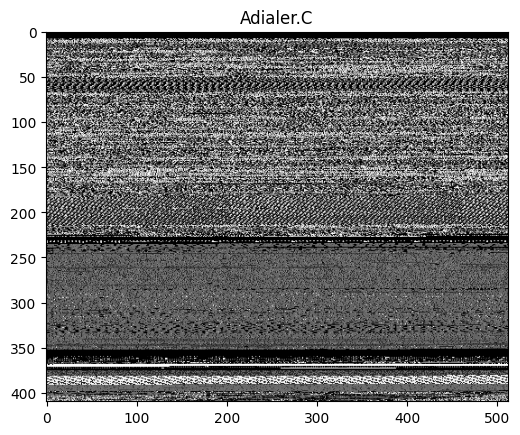

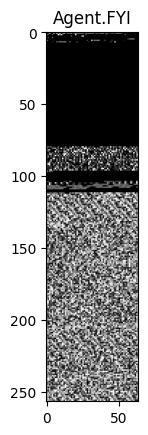

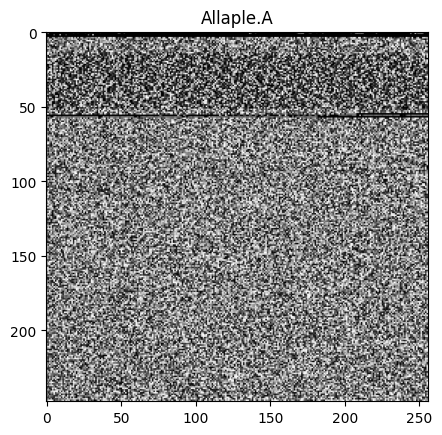

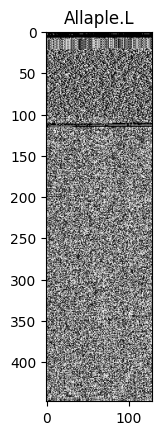

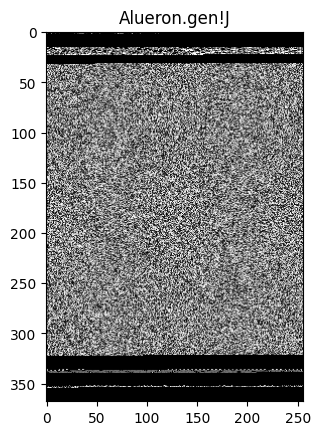

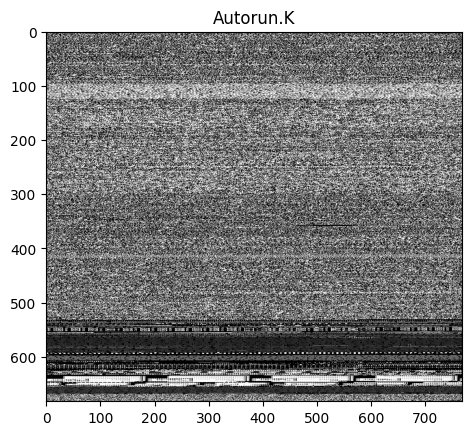

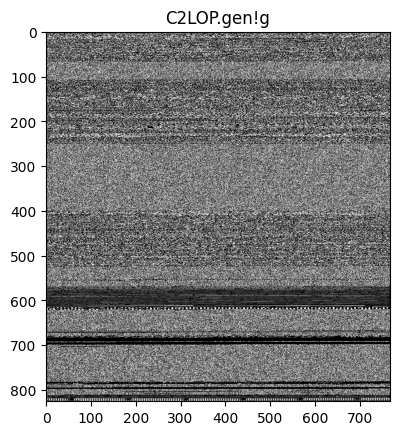

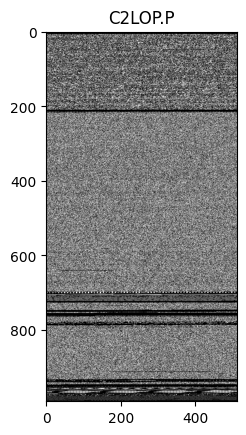

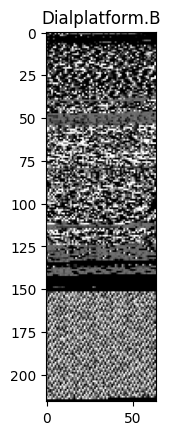

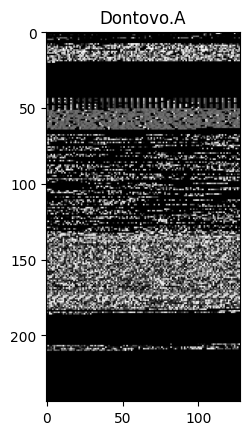

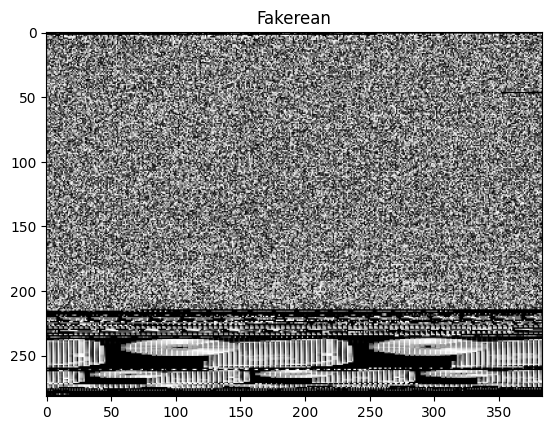

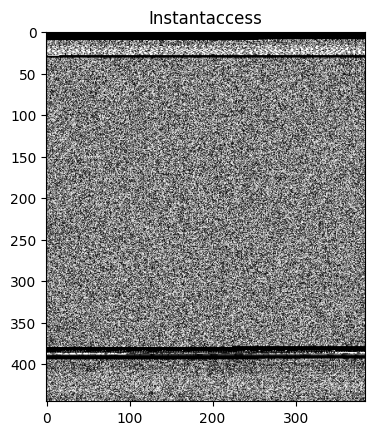

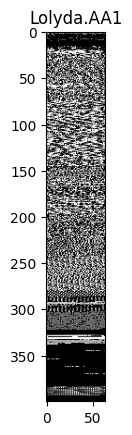

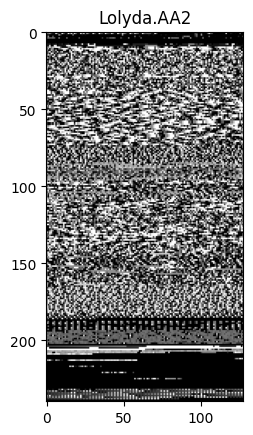

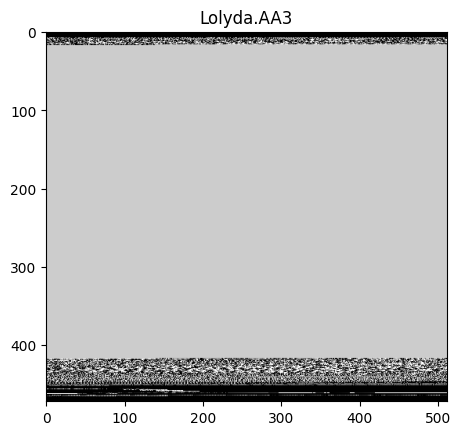

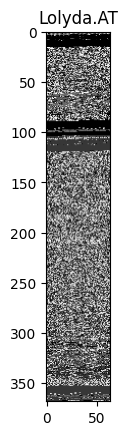

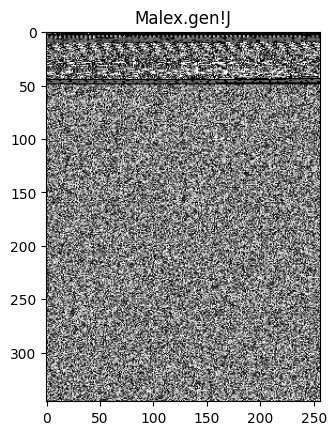

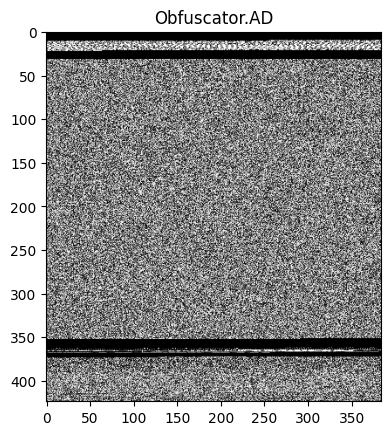

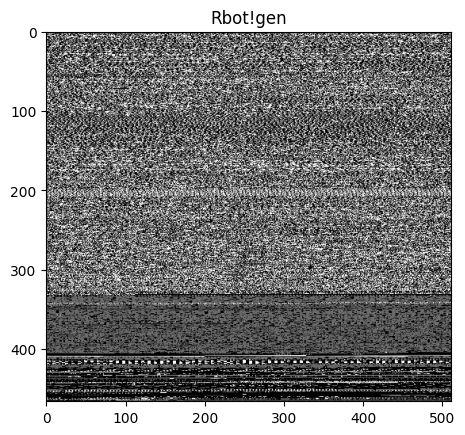

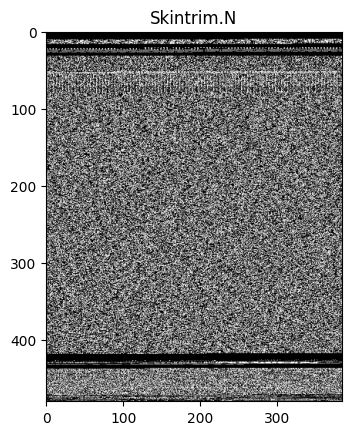

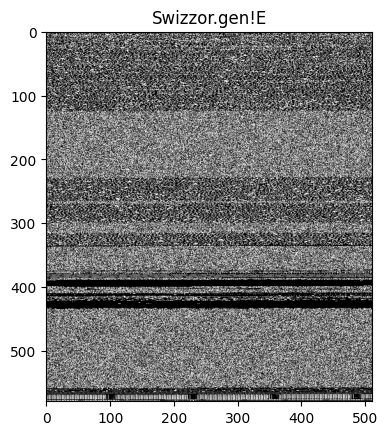

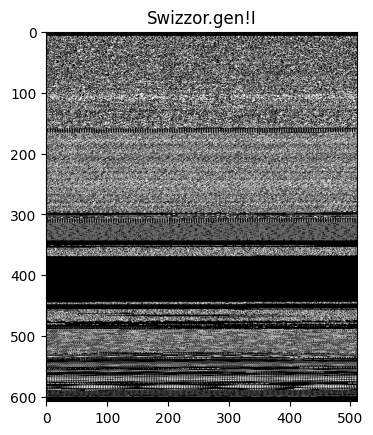

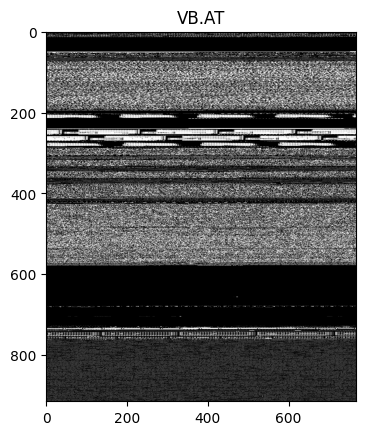

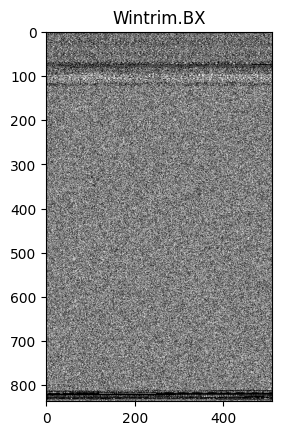

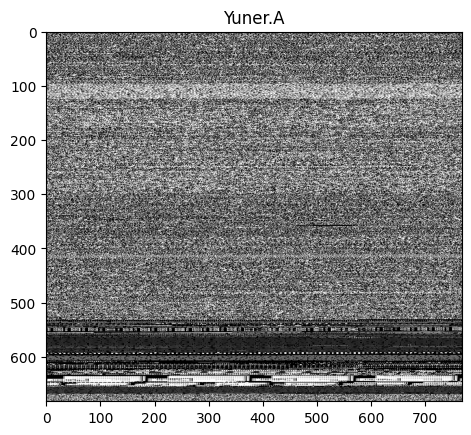

In [21]:
image = tf.keras.utils
# 2. Plotee las imágenes de los ejemplos de malware
for family in families:
    img_path = os.path.join(data_path, family, os.listdir(os.path.join(data_path, family))[0])
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(family)
    plt.show()

In [22]:
# 3. Construcción del modelo de red neuronal convolucional
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(families), activation='softmax')
])


In [23]:
# 4. Mostrar el resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

In [24]:
# Compilando el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
# 5. Dividir el dataset en entrenamiento y prueba (70% - 30%)
# Función para cargar imágenes y etiquetas
def load_images_and_labels(data_path, families):
    images = []
    labels = []
    for label, family in enumerate(families):
        family_path = os.path.join(data_path, family)
        if os.path.isdir(family_path):
            for img_name in os.listdir(family_path):
                img_path = os.path.join(family_path, img_name)
                img = image.load_img(img_path, target_size=(64, 64))
                img_array = image.img_to_array(img)
                images.append(img_array)
                labels.append(label)
    return np.array(images), np.array(labels)

# Cargar imágenes y etiquetas
X, y = load_images_and_labels(data_path, families)

# Dividir el dataset en entrenamiento y prueba (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
# 6. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
205/205 [==============================] - 28s 126ms/step - loss: 3.1157 - accuracy: 0.6583 - val_loss: 0.6206 - val_accuracy: 0.7991
Epoch 2/10
205/205 [==============================] - 23s 112ms/step - loss: 0.4805 - accuracy: 0.8657 - val_loss: 0.3444 - val_accuracy: 0.9001
Epoch 3/10
205/205 [==============================] - 25s 122ms/step - loss: 0.2723 - accuracy: 0.9226 - val_loss: 0.3420 - val_accuracy: 0.9026
Epoch 4/10
205/205 [==============================] - 24s 117ms/step - loss: 0.1934 - accuracy: 0.9426 - val_loss: 0.2450 - val_accuracy: 0.9258
Epoch 5/10
205/205 [==============================] - 22s 106ms/step - loss: 0.1444 - accuracy: 0.9517 - val_loss: 0.2187 - val_accuracy: 0.9411
Epoch 6/10
205/205 [==============================] - 24s 116ms/step - loss: 0.0991 - accuracy: 0.9680 - val_loss: 0.1960 - val_accuracy: 0.9504
Epoch 7/10
205/205 [==============================] - 23s 111ms/step - loss: 0.1499 - accuracy: 0.9582 - val_loss: 0.1912 - val_ac

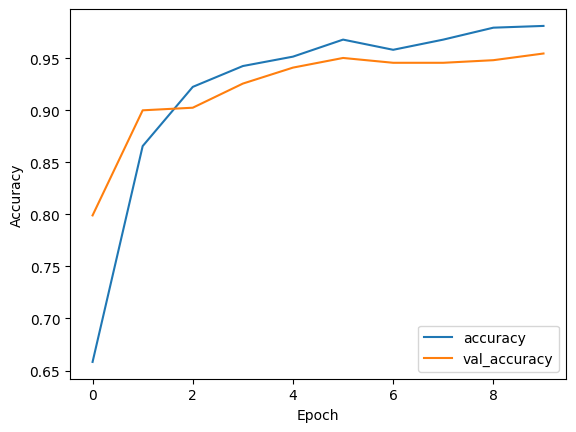

In [28]:
# 7. Mostrar las métricas del modelo
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [32]:
# 8. Evaluar el modelo con el dataset de pruebas y discutir los resultados
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=-1)

print("Test accuracy: ", test_acc)
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))


88/88 - 2s - loss: 0.2046 - accuracy: 0.9547 - 2s/epoch - 23ms/step
88/88 [==============================] - 2s 22ms/step
Test accuracy:  0.9546752572059631

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33
           2       0.98      0.99      0.99       899
           3       0.98      1.00      0.99       457
           4       1.00      1.00      1.00        66
           5       0.00      0.00      0.00        34
           6       0.69      0.88      0.77        50
           7       0.84      0.55      0.67        47
           8       1.00      1.00      1.00        60
           9       1.00      1.00      1.00        50
          10       1.00      0.99      1.00       104
          11       1.00      1.00      1.00       137
          12       0.98      0.94      0.96        51
          13       0.95      1.00      0.97        57
       

d:\Users\rssto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Users\rssto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Users\rssto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,